Ранее мы рассмотрели основы [парсинга данных с сайтов](https://idatica.com/blog/parsing-saytov-na-python-rukovodstvo-dlya-novichkov/). Но знаете ли вы, что парсинг применим также для данных в табличном виде? Если вы часто сидите в Интернете, то, вероятно, заметили, что многие веб-сайты содержат таблицы. Например, расписание рейсов, характеристики продукта, дифференцирование услуг, расписание телепередач, рейтинг и многое другое.

В некоторых случаях можно легко скопировать таблицу и вставить в Excel без единой строчки кода. Но учтите, что специалисты по обработке и анализу данных работают с намного большими объемами данных, где метод копирования-вставки не очень эффективен. Итак, теперь мы покажем вам, как парсить таблицу с сайта на Python.

# ШАГ 1. УСТАНОВКА БИБЛИОТЕК

Прежде всего, нужно установить в нашу среду разработки библиотеки:

- BeautifulSoup4
- Requests
- pandas
- lxml
Если у вас возникли проблемы на этом этапе, рекомендуем прочитать статью о парсинге сайтов на Python.

# ШАГ 2. ИМПОРТИРОВАНИЕ БИБЛИОТЕК

Как только необходимые библиотеки установлены, мы можем открыть Spyder. Мы выбираем именно Spyder, потому что его удобнее использовать для проектов. Но вы можете иметь свои предпочтения.

Следующий этап парсинга таблицы на Python — это импортирование библиотеки:

In [2]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# ШАГ 3. ВЫБОР СТРАНИЦЫ

В этом проекте мы будем парсить таблицу данных covid с [Worldometers](https://www.worldometers.info/coronavirus/). Как и в предыдущем руководстве, данный веб-сайт также создан с помощью HTML и считается более легким для понимания новичками.

# ШАГ 4. ЗАПРОС РАЗРЕШЕНИЯ

После выбора страницы для парсинга мы можем скопировать ее URL-адрес и использовать requests, чтобы запросить разрешение у сервера на получение данных с их сайта.

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-ic
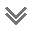

In [3]:
# Create an URL object
url = 'https://www.worldometers.info/coronavirus/'
# Create object page
page = requests.get(url)
# Результат <Response [200]> означает, что сервер позволяет нам собирать информацию. 
# Дальше необходимо обработать HTML-код с помощью lxml, чтобы сделать его более 
# доступным для чтения.

# parser-lxml = Change html to Python friendly format
# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')
soup

# ШАГ 5. ПРОСМОТР КОДА ЭЛЕМЕНТОВ ТАБЛИЦЫ

В предыдущей статье мы узнали, как просмотреть код каждого элемента на странице веб-сайта. Чтобы получить информацию о коде элементов таблицы, нам нужно сначала проверить ее расположение.
![](https://idatica.com/wp-content/uploads/2022/01/1-FAY5C78rrcAdEtnUQyzwGQ-1030x504.jpeg)

Как видно из рисунка выше, эта таблица находится внутри тега <table> и id = ‘main_table_countries_today’. Теперь мы можем определить переменную. В нашем случае мы определим таблицу как ‘table1’.

In [5]:
# Obtain information from tag <table>
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

# ШАГ 6. СОЗДАНИЕ КОЛОНОК

После создания table1 мы можем посмотреть расположение каждой колонки. Если мы просмотрим все колонки, то заметим, что они имеют одну и ту же характеристику.
![](https://idatica.com/wp-content/uploads/2022/01/1-3RIQjVlvfUrSwQtLE7eDNw.jpeg)
На рисунке видна общая характеристика каждой колонки — они расположены внутри тега <th>.

После нахождения тегов мы создаем цикл for, чтобы заполнить пустой список нашими колонками. Давайте определим пустой список как headers.

In [8]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

Список успешно заполнен и мы можем проверить его еще раз. Давайте посмотрим на индекс 13, здесь многострочный текст. Подобный перенос может быть проблемой, когда мы захотим сделать из него фрейм данных, поэтому необходимо преобразовать его в однострочный текст.

In [10]:
# Convert wrapped text in column 13 into one line text
headers[13] = 'Tests/1M pop'

# ШАГ 7. СОЗДАНИЕ ФРЕЙМА ДАННЫХ

In [11]:
'''
Следующий этап парсинга таблицы с помощью Python — это создание фрейма данных. 
Предлагаю определить фрейм данных как mydata.
'''
mydata = pd.DataFrame(columns = headers)
mydata

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


# ШАГ 8. СОЗДАНИЕ ЦИКЛА FOR ДЛЯ ЗАПОЛНЕНИЯ ФРЕЙМА ДАННЫХ

Как только фрейм данных готов, мы можем заполнить его элементами в каждой колонке. До момента создания цикла for нам нужно еще определить место расположения строки и колонки элемента.
![Место расположения строки](https://idatica.com/wp-content/uploads/2022/01/1-3b0fFnJ_GKCDNCbJxt3VLA-1030x335.jpeg)
![Место расположения колонки](https://idatica.com/wp-content/uploads/2022/01/1-b-yFsu-q2XHOA3zc_9vTgQ-1030x246.jpeg)

На рисунках выше видно, что строка находится внутри тега <tr>, а элементы — внутри тега <td>. Это применимо ко всем строкам и элементам в таблице.

Теги найдены и теперь можно создавать цикл for.

In [17]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row
mydata.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,\nNorth America\n,"119,540,593","+12,622","1,566,260",+67,"114,858,891","+6,205","3,115,442","8,698",...,,,,North America,\n,,,,,
1,,\nAsia\n,"200,393,927","+251,410","1,500,361",+281,"190,987,819","+94,470","7,905,747","9,526",...,,,,Asia,\n,,,,,
2,,\nEurope\n,"239,363,912","+18,622","1,964,602",+102,"233,526,809","+73,401","3,872,501","7,713",...,,,,Europe,\n,,,,,
3,,\nSouth America\n,"65,435,881","+1,923","1,336,638",+10,"63,260,400","+7,663","838,843","10,183",...,,,,South America,\n,,,,,
4,,\nOceania\n,"13,138,488","+5,883","22,419",+20,"12,789,310",+657,"326,759",150,...,,,,Australia/Oceania,\n,,,,,
